## Project Economic Indicator

### Taniya Adhikari
#### DSC530

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import thinkplot
import thinkstats2

import statistics

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import scipy

#### Data Importing and Cleaning

It was harder to find historical dataset for all the indicators, therefore, I had download them seperately and merge them. Here is the link for the Dataset [OECD DATA](https://data.oecd.org/)

In [245]:
# check for missing value and dropping missing variables
def percentMissing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)
    
    # % of missing data
    for col in df.columns:
        # create missing indicator for features with missing data
        missing = df[col].isnull()
        pct_missing = np.mean(missing)*100
        print('{} - {}%'.format(col, round(pct_missing)))
        num_missing = np.sum(missing)
    
        if num_missing > 0:  
            df['{}_ismissing'.format(col)] = missing
        
    ismissing_cols = [col for col in df.columns if 'ismissing' in col]
    df['num_missing'] = df[ismissing_cols].sum(axis=1)
    
    # dropping row with at least one missing feature
    ind_missing = df[df['num_missing']>1].index
    clean_df = df.drop(ind_missing, axis=0)
    
    return clean_df



In [246]:
# subsetting data for only two country
def subsetdata(df):
    
    # filtering for yearly value
    df_filtered = df[df['FREQUENCY'] =='A']
    df_filtered['TIME'] = pd.to_numeric(df_filtered['TIME'])
    
    # selecting colums only for Location, Time, and value
    df1 = df_filtered[['LOCATION', 'TIME', 'Value']]
    
    # subsetting dataset for only US & JAP from year 1975 - 2017
    usa = df1[(df1.LOCATION == 'USA') & (df1.TIME >=1975)]
    jpn = df1[(df1.LOCATION == 'JPN') & (df1.TIME >=1975)]
    df2 = pd.concat([usa, jpn])

    
    df3 = percentMissing(df2)
    
    df4 = df3[['LOCATION', 'TIME', 'Value']]
    
    # droppong values because I need only data till 2017
    df5 = df4[df4['TIME'] < 2018]
    
    index = df5.index
    number_of_rows = len(index)
    print("total_rows: {}". format(number_of_rows))
            
    return df5

In [247]:
# checking data type
def Datatype(df):
    # shape and data types of the data
    print(df.shape)
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)

In [248]:
def DataImporting():
    # read the data

    corp_tax_df = pd.read_csv('Corporate TAX.csv')
    interest_df = pd.read_csv('long-term interest rates.csv')
    uemp_df = pd.read_csv('UnemploymentRate.csv')
    income_tax_df = pd.read_csv('Tax_Personal_Income.csv')
    GDP_df = pd.read_csv('GDP.csv')
    CPI_df = pd.read_csv('CPI.csv')
    
    #renaming columns
    corp_tax = subsetdata(corp_tax_df)
    corp_tax = corp_tax.rename(columns={'Value': 'Corporate_Tax'})
    
    interest = subsetdata(interest_df)
    interest = interest.rename(columns={'Value': 'Interest_Rates'})
    
    uemp = subsetdata(uemp_df)
    uemp = uemp.rename(columns={'Value': 'Unemployment_Rates'})
    
    income_tax = subsetdata(income_tax_df)
    income_tax = income_tax.rename(columns={'Value': 'Income_Tax'})
    
    GDP = subsetdata(GDP_df)
    GDP = GDP.rename(columns={'Value': 'GDP'})
    
    CPI = subsetdata(CPI_df)
    CPI = CPI.rename(columns={'Value': 'CPI'})
    
    # merging the data
    merged_data = pd.merge(corp_tax, interest, how='left', on=['LOCATION', 'TIME']).merge(uemp).merge(income_tax).merge(GDP).merge(CPI)
    merged_data = merged_data.fillna(0)
                     
    return merged_data


In [249]:
econ_df = DataImporting()
econ_df

['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 86
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 72
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 86
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 86
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 86
['TIME' 'Value']
LOCATION - 0%
TIME - 0%
Value - 0%
total_rows: 86


,LOCATION,TIME,Corporate_Tax,Interest_Rates,Unemployment_Rates,Income_Tax,GDP,CPI
0,USA,1975,34.648,7.987500,8.466666,34.648,7801.167695,9.143147
1,USA,1976,34.727,7.611667,7.716667,34.727,8590.244216,5.744812
2,USA,1977,35.358,7.419167,7.066667,35.358,9450.431025,6.501684
3,USA,1978,36.406,8.410000,6.066667,36.406,10562.860180,7.630964
4,USA,1979,38.362,9.442500,5.833333,38.362,11671.541410,11.254470
...,...,...,...,...,...,...,...,...
81,JPN,2013,19.228,0.689667,4.025000,19.228,39008.360560,0.346440
82,JPN,2014,18.902,0.520333,3.591667,18.902,39183.465680,2.761954
83,JPN,2015,18.863,0.350000,3.375000,18.863,40406.095330,0.789518
84,JPN,2016,18.592,-0.066250,3.116667,18.592,39990.049450,-0.116667


Dataset has 8 Variables and 86 Observations

In [253]:
# assigning to variables
corptax = np.floor(econ_df.Corporate_Tax)
IR = np.floor(econ_df.Interest_Rates)
unempR = np.floor(econ_df.Unemployment_Rates)
inctax = np.floor(econ_df.Income_Tax)
gdp = np.floor(econ_df.GDP)
cpi = np.floor(econ_df.CPI)

For this analysis I chose two Countries one is USA and another one is JAPAN. The reason to choose this because historically, Japan had lower Corporate tax compared to USA. So I wanted to compare both company to see if there is a difference in Uemployment rate for the two.

Subsetting the data for each company

In [254]:
usa = econ_df[econ_df.LOCATION == "USA"]
jpn = econ_df[econ_df.LOCATION == "JPN"]

#### US Corporate Tax Histogram

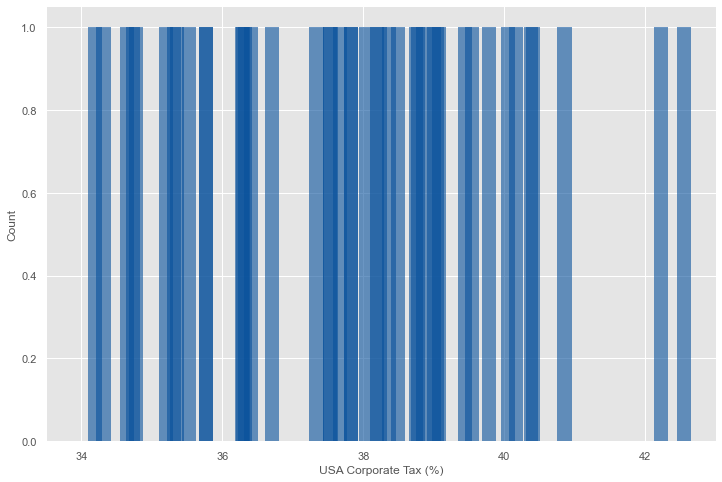

In [255]:
usa_corp_tax = thinkstats2.Hist(usa.Corporate_Tax)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(usa_corp_tax, width=width)
thinkplot.Config(xlabel='USA Corporate Tax (%)', ylabel='Count', xlim=[33.5, 43])

Looks it is a Uniform Distribution.

#### JPN Corporate Tax Histogram

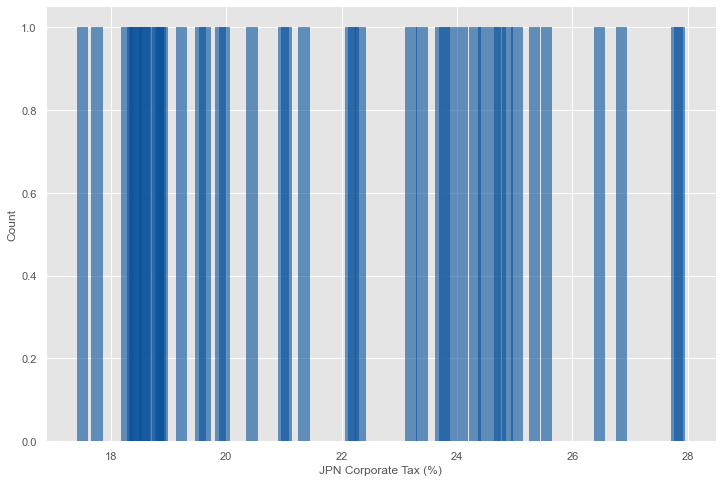

In [256]:
jpn_corp_tax = thinkstats2.Hist(jpn.Corporate_Tax)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(jpn_corp_tax, width=width)
thinkplot.Config(xlabel='JPN Corporate Tax (%)', ylabel='Count')

#### US Interest Rates Histogram

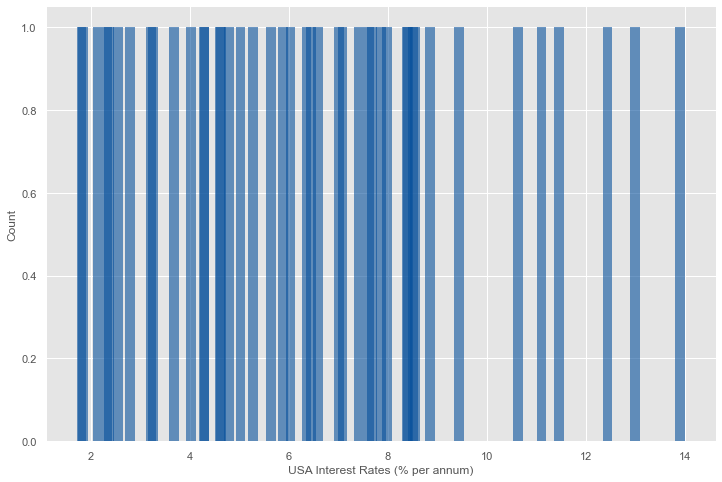

In [257]:
usa_IR_tax = thinkstats2.Hist(usa.Interest_Rates)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(usa_IR_tax, width=width)
thinkplot.Config(xlabel='USA Interest Rates (% per annum)', ylabel='Count')

#### JPN Interest Rates Histogram

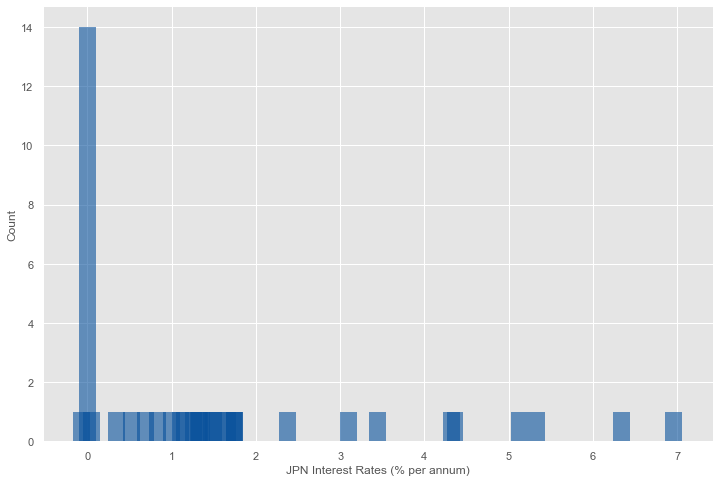

In [258]:
jpn_IR_tax = thinkstats2.Hist(jpn.Interest_Rates)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(jpn_IR_tax, width=width)
thinkplot.Config(xlabel='JPN Interest Rates (% per annum)', ylabel='Count')

#### US Unemployment Rates Histogram

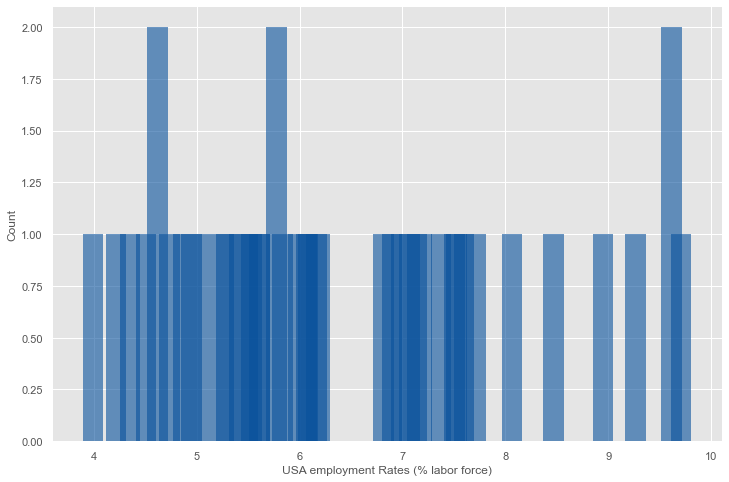

In [259]:
usa_unemp_R = thinkstats2.Hist(usa.Unemployment_Rates)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(usa_unemp_R, width=width)
thinkplot.Config(xlabel='USA employment Rates (% labor force)', ylabel='Count')

#### JPN Unemployment Rates Histogram

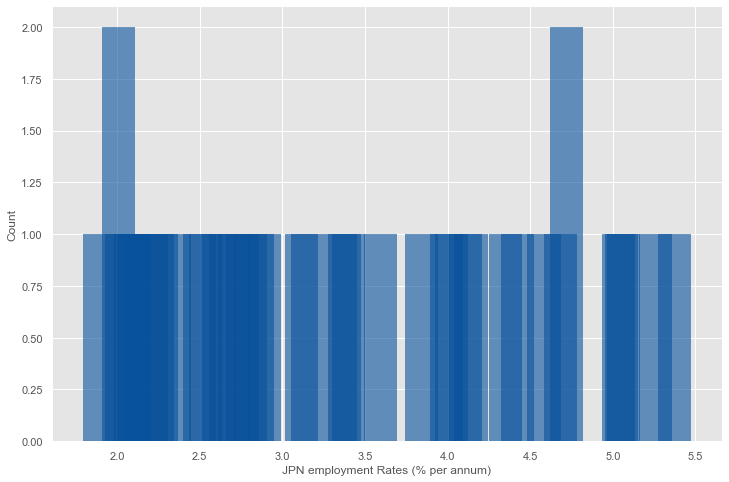

In [260]:
jpn_unemp_R = thinkstats2.Hist(jpn.Unemployment_Rates)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(jpn_unemp_R , width=width)
thinkplot.Config(xlabel='JPN employment Rates (% per annum)', ylabel='Count')

#### USA Income Tax Rates Histogram

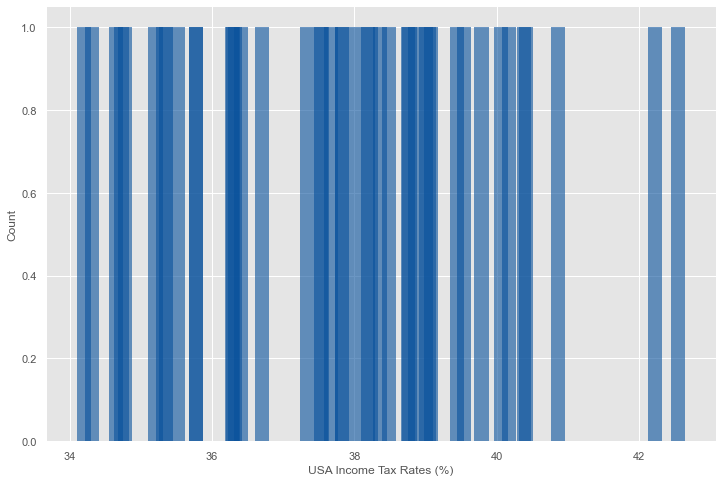

In [261]:
usa_inc_tax = thinkstats2.Hist(usa.Income_Tax)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(usa_inc_tax , width=width)
thinkplot.Config(xlabel='USA Income Tax Rates (%)', ylabel='Count')

#### JPN Income Tax Rates Histogram

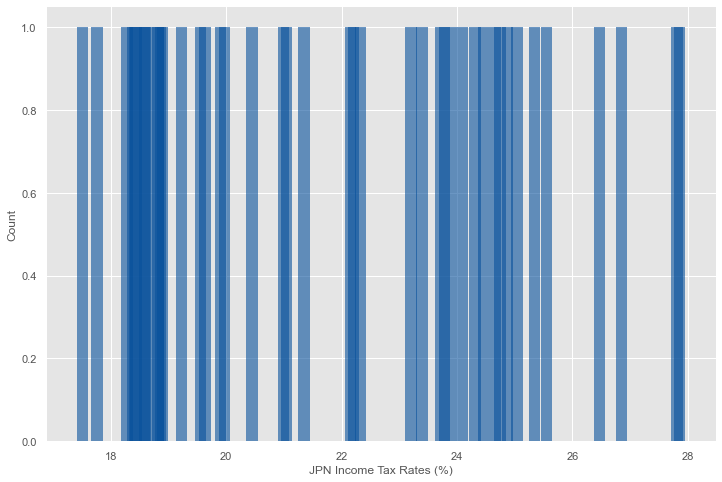

In [262]:
jpn_inc_tax = thinkstats2.Hist(jpn.Income_Tax)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(jpn_inc_tax , width=width)
thinkplot.Config(xlabel='JPN Income Tax Rates (%)', ylabel='Count')

#### USA CPI Histogram

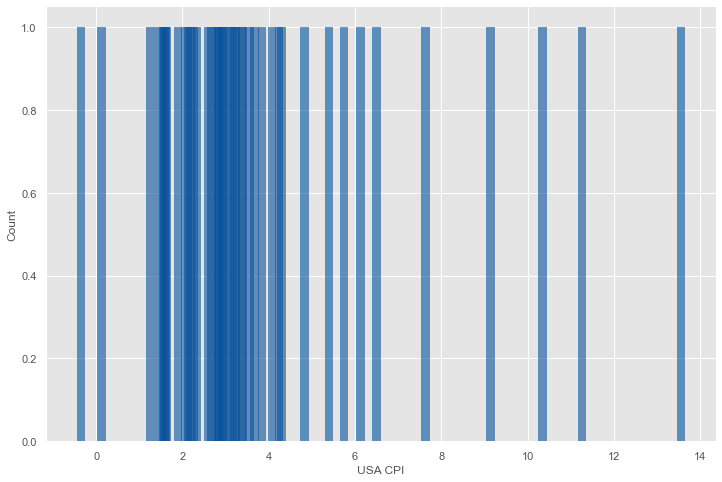

In [263]:
usa_CPI = thinkstats2.Hist(usa.CPI)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(usa_CPI , width=width)
thinkplot.Config(xlabel='USA CPI', ylabel='Count')

#### JPN CPI Histogram

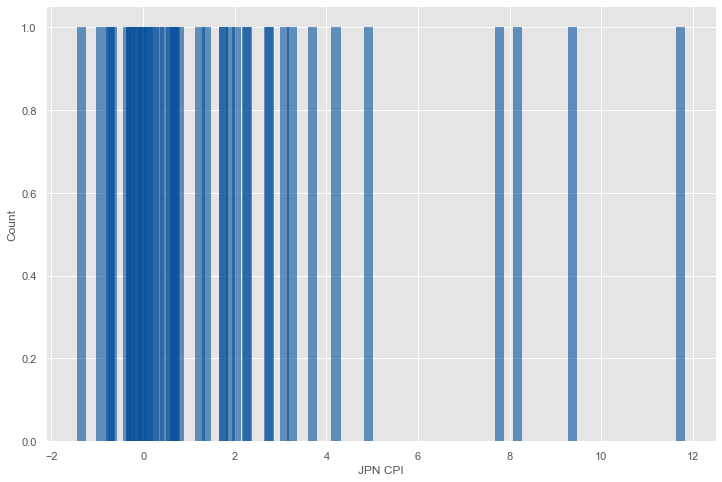

In [264]:
jpn_CPI = thinkstats2.Hist(jpn.CPI)
width = 0.2
thinkplot.PrePlot(1)
thinkplot.Hist(jpn_CPI , width=width)
thinkplot.Config(xlabel='JPN CPI', ylabel='Count')

In [267]:
All of the variables are uniform distribution, except Unemployment rate, it seems that there are some anamoly, that is causing it to be multimodal distribution.

SyntaxError: invalid syntax (<ipython-input-267-9e972ffe3c24>, line 1)

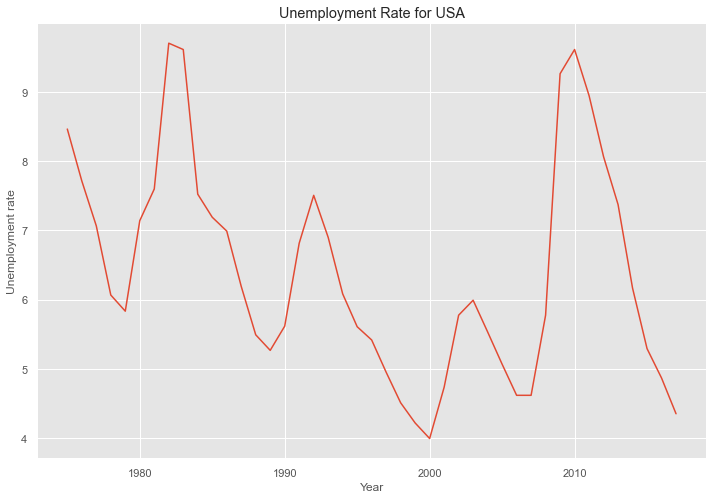

In [268]:
plt.plot(usa.TIME, usa.Unemployment_Rates)
plt.title('Unemployment Vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment rate')
plt.title("Unemployment Rate for USA")
plt.show()

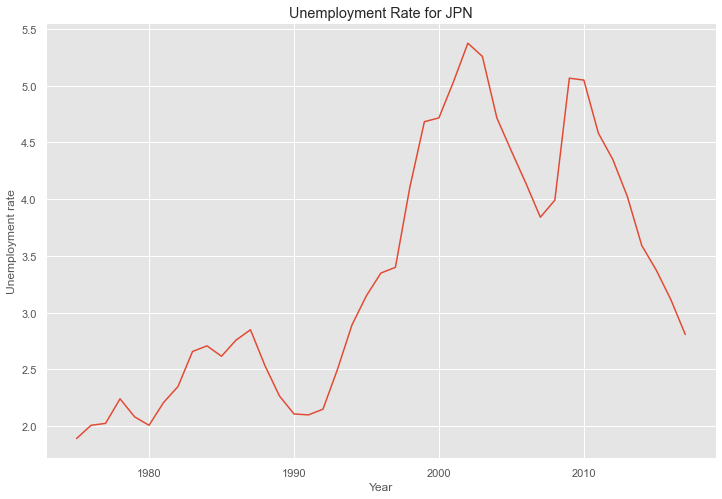

In [269]:
plt.plot(jpn.TIME, jpn.Unemployment_Rates)
plt.title('Unemployment Vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment rate')
plt.title("Unemployment Rate for JPN")
plt.show()

Unemployment rates for Japan and USA has opposite trend lines.

In [270]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [271]:
def SummaryStatistics(group1, group2):
    mean1 = group1.mean()
    median1= group1.median()
    mode1 = statistics.mode(group1)
    var1 = group1.var()
    std1 = group1.std()
    
    mean2 = group2.mean()
    median2= group2.median()
    mode2 = statistics.mode(group2)
    var2 = group2.var()
    std2 = group2.std()
    
    CEF = CohenEffectSize(group1, group2)
    
    print("Mean of {}: {}".format("group1", mean1))
    print("Median of {}: {}".format("group1", median1))
    print("Mode of {}: {}".format("group1", mode1))
    print("Variance of {}: {}".format("group1", var1))
    print("Standard Deviation of {}: {}\n".format("group1", std1))
    
    
    print("Mean of {}: {}".format("group2", mean2))
    print("Median of {}: {}".format("group2", median2))
    print("Mode of {}: {}".format("group2", mode2))
    print("Variance of {}: {}".format("group2", var2))
    print("Standard Deviation of {}: {}\n".format("group2", std2))
    
    print("Cohen Effect Size: {}".format(CEF))
    

#### Corporate tax Summary Statistics

In [272]:
SummaryStatistics(usa.Corporate_Tax, jpn.Corporate_Tax)

Mean of group1: 37.75730232558139
Median of group1: 37.832
Mode of group1: 34.648
Variance of group1: 4.5248093111849395
Standard Deviation of group1: 2.1271599166928987

Mean of group2: 21.835093023255816
Median of group2: 21.35
Mode of group2: 23.903000000000002
Variance of group2: 9.347844943521594
Standard Deviation of group2: 3.057424560560995

Cohen Effect Size: 6.045587971125058


Mean for USA Corporate tax is 37.75% and Standard Deviation is 2.12%, median is 37.832% and mode is 34.648%. The Mean for Japan is slightly lower to 21.835% with standard deviations of 3.05%, median is 21.35% and mode is 23.90%. Cohen Effect Size is 6.045

In [273]:
SummaryStatistics(usa.Interest_Rates, jpn.Interest_Rates)

Mean of group1: 6.44294565116279
Median of group1: 6.3525
Mode of group1: 7.9875
Variance of group1: 10.003866569961136
Standard Deviation of group1: 3.162888959473781

Mean of group2: 1.4804612783720934
Median of group2: 1.102417
Mode of group2: 0.0
Variance of group2: 3.441806787395711
Standard Deviation of group2: 1.8552107123978427

Cohen Effect Size: 1.9139159940549761


Mean for USA Interest Rates is 6.44% and Standard Deviation is 3.16%, median is 6.35% and mode is 7.987%. The Mean for Japan is quite lower to 1.48% with standard deviation of 1.855%, median is 1.1024% and mode is 0.0. Cohen Effect Size is 1.913

In [274]:
SummaryStatistics(usa.Unemployment_Rates, jpn.Unemployment_Rates)

Mean of group1: 6.408139627906978
Median of group1: 6.066667
Mode of group1: 9.616667
Variance of group1: 2.476446517934144
Standard Deviation of group1: 1.5736729386801263

Mean of group2: 3.328294558139535
Median of group2: 3.1166669999999996
Mode of group2: 2.0083330000000004
Variance of group2: 1.1977882264766333
Standard Deviation of group2: 1.0944351175271347

Cohen Effect Size: 2.2722725291886654


Mean for USA employment rate is 6.408% and Standard Deviation is 1.57%,, median is 6.07% and mode is 9.616%. The Mean for Japan is slightly lower to 3.328% with standard deviation of 1.0944%, median is 3.11% and mode is 2.0%. Cohen Effect Size is 2.2722

In [275]:
SummaryStatistics(usa.Income_Tax, jpn.Income_Tax)

Mean of group1: 37.75730232558139
Median of group1: 37.832
Mode of group1: 34.648
Variance of group1: 4.5248093111849395
Standard Deviation of group1: 2.1271599166928987

Mean of group2: 21.835093023255816
Median of group2: 21.35
Mode of group2: 23.903000000000002
Variance of group2: 9.347844943521594
Standard Deviation of group2: 3.057424560560995

Cohen Effect Size: 6.045587971125058


Mean for USA income tax rate is 37.75% and Standard Deviation is 2.13%, median is 37.8% and mode is 34.648%. The Mean for Japan is slightly lower to 21.835% with standard deviation of 3.057%, median is 26.35% and mode is 23.90%. Cohen Effect Size is 6.046

In [276]:
SummaryStatistics(usa.GDP, jpn.GDP)

Mean of group1: 31776.071547348838
Median of group1: 29932.157769999998
Mode of group1: 7801.167695
Variance of group1: 245323328.4440044
Standard Deviation of group1: 15662.800785428013

Mean of group2: 23464.059019697674
Median of group2: 24524.08672
Mode of group2: 5250.241876
Variance of group2: 121639473.60329053
Standard Deviation of group2: 11029.028679049236

Cohen Effect Size: 0.6136350603459536


Mean for USA GDP is 31776.1 and Standard Deviation is 15662.8, the median is 29932.15 and mode is 7801.16. The Mean for Japan is slightly lower to 23464.06 with standard deviation of 11029.03, the median is 24524.09 and mode is 5250.24. Cohen Effect Size is 0.613635

In [277]:
SummaryStatistics(usa.CPI, jpn.CPI)

Mean of group1: 3.837366297674417
Median of group1: 3.02882
Mode of group1: 9.143147
Variance of group1: 8.209262647761253
Standard Deviation of group1: 2.8651810846369297

Mean of group2: 1.7497636326046526
Median of group2: 0.6785576
Mode of group2: 11.73127
Variance of group2: 8.254820638557565
Standard Deviation of group2: 2.8731203661798723

Cohen Effect Size: 0.7276023000473194


Mean for USA CPI is 3.83 and Standard Deviation is 2.87, the median is 3.028% and mode is 9.14%. The Mean for Japan is slightly lower to 1.75 with standard deviation of 2.87, the median is 0.678% and mode is 11.7312%. Cohen Effect Size is 0.728

#### THE PMFs

###### Corporate Tax Rate PMFs

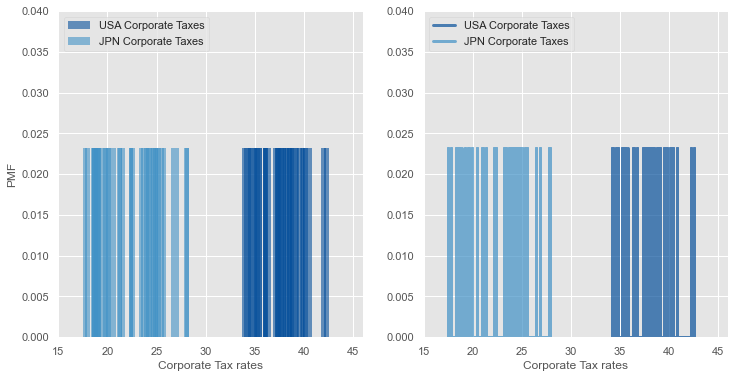

In [278]:
usa_corp_pmf = thinkstats2.Pmf(usa.Corporate_Tax, label='USA Corporate Taxes')
jpn_corp_pmf = thinkstats2.Pmf(jpn.Corporate_Tax, label='JPN Corporate Taxes')

width=0.45
axis = [15, 46, 0, 0.04]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(usa_corp_pmf, align='right', width=width)
thinkplot.Hist(jpn_corp_pmf, align='left', width=width)
thinkplot.Config(xlabel='Corporate Tax rates', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([usa_corp_pmf, jpn_corp_pmf])
thinkplot.Config(xlabel='Corporate Tax rates', axis=axis)

###### Interest Rates PMFs

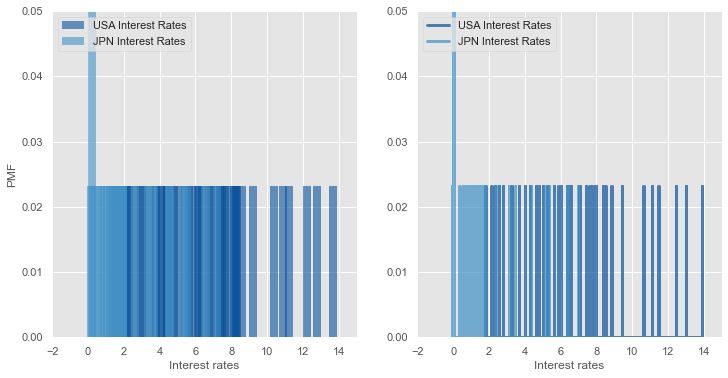

In [279]:
usa_IR_pmf = thinkstats2.Pmf(usa.Interest_Rates, label='USA Interest Rates')
jpn_IR_pmf = thinkstats2.Pmf(jpn.Interest_Rates, label='JPN Interest Rates')

width=0.45
axis = [-2, 15, 0, 0.05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(usa_IR_pmf, align='right', width=width)
thinkplot.Hist(jpn_IR_pmf, align='left', width=width)
thinkplot.Config(xlabel='Interest rates', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([usa_IR_pmf, jpn_IR_pmf])
thinkplot.Config(xlabel='Interest rates', axis=axis)

###### Unemployment Rates PMFs

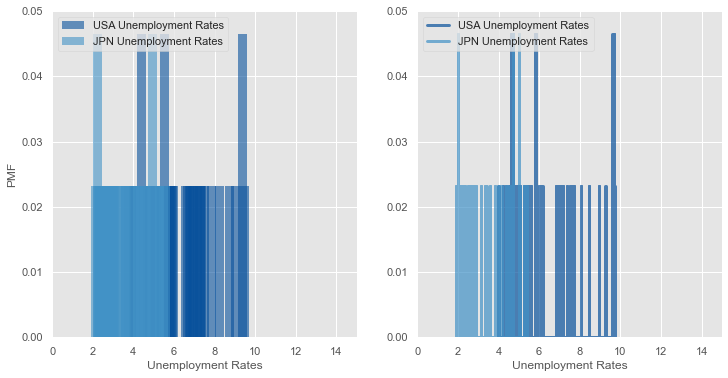

In [282]:
usa_UP_pmf = thinkstats2.Pmf(usa.Unemployment_Rates, label='USA Unemployment Rates')
jpn_UP_pmf = thinkstats2.Pmf(jpn.Unemployment_Rates, label='JPN Unemployment Rates')

width=0.45
axis = [0, 15, 0, 0.05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(usa_UP_pmf, align='right', width=width)
thinkplot.Hist(jpn_UP_pmf, align='left', width=width)
thinkplot.Config(xlabel='Unemployment Rates', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([usa_UP_pmf, jpn_UP_pmf])
thinkplot.Config(xlabel='Unemployment Rates', axis=axis)

###### Interest Tax Rates PMFs

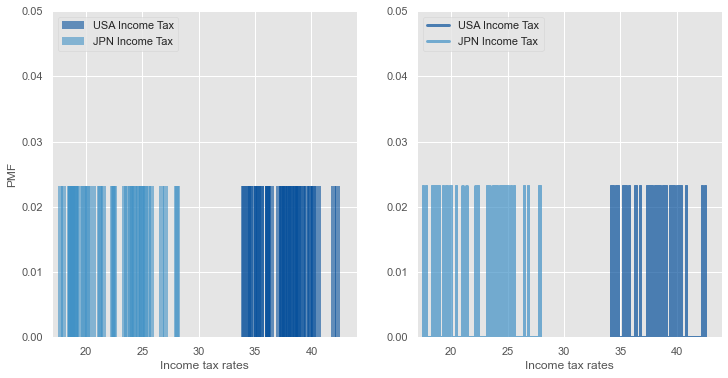

In [283]:
usa_IT_pmf = thinkstats2.Pmf(usa.Income_Tax, label='USA Income Tax')
jpn_IT_pmf = thinkstats2.Pmf(jpn.Income_Tax, label='JPN Income Tax')

width=0.45
axis = [17, 44, 0, 0.05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(usa_IT_pmf, align='right', width=width)
thinkplot.Hist(jpn_IT_pmf, align='left', width=width)
thinkplot.Config(xlabel='Income tax rates', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([usa_IT_pmf, jpn_IT_pmf])
thinkplot.Config(xlabel='Income tax rates', axis=axis)

###### Interest CPI PMFs

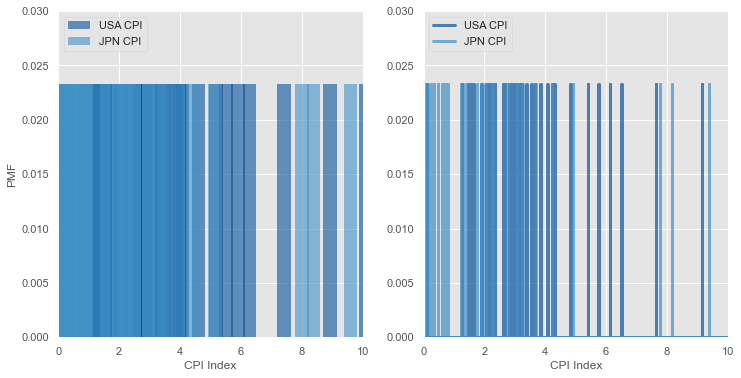

In [284]:
usa_CP_pmf = thinkstats2.Pmf(usa.CPI, label='USA CPI')
jpn_CP_pmf = thinkstats2.Pmf(jpn.CPI, label='JPN CPI')

width=0.45
axis = [0, 10, 0, 0.03]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(usa_CP_pmf, align='right', width=width)
thinkplot.Hist(jpn_CP_pmf, align='left', width=width)
thinkplot.Config(xlabel='CPI Index', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([usa_CP_pmf, jpn_CP_pmf])
thinkplot.Config(xlabel='CPI Index', axis=axis)

For CDF Evaluation, I will be plotting Corporate tax rate, because that is the variable that I will be using as a independent variable. I will be doing that for both Japan and USA, because tax rates are independent of each other.

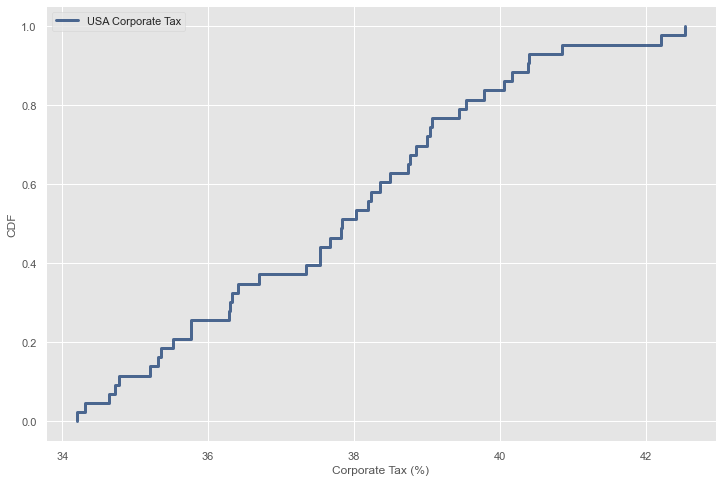

In [285]:
# CDF of US Corporate tax rate
cdf = thinkstats2.Cdf(usa.Corporate_Tax, label='USA Corporate Tax')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Corporate Tax (%)', ylabel='CDF', loc='upper left')

CDF for USA Corporate tax has almost straight line

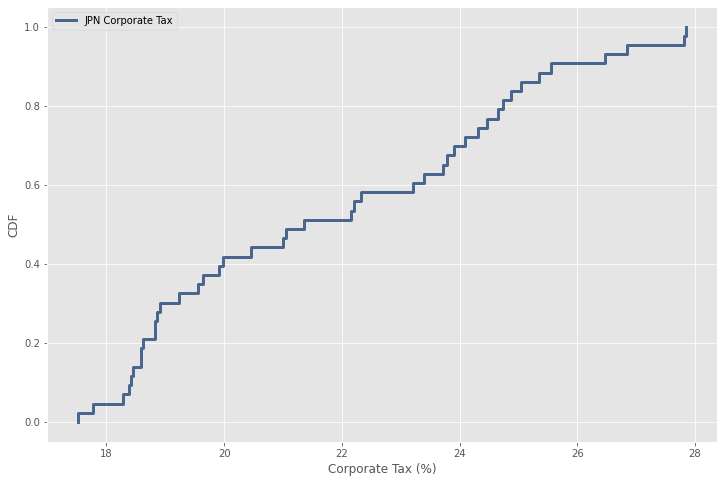

In [191]:
# CDF of JPN Corporate tax rates
cdf = thinkstats2.Cdf(jpn.Corporate_Tax, label='JPN Corporate Tax')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Corporate Tax (%)', ylabel='CDF', loc='upper left')

All of the variables are almost uniform distribution except Unemployment rates, which means each outcome has equal probability of occurring. That means they are random. If I have to choose a distribution, I would choose Exponential disytibution, because the CDF plot is not exactly straight and has a slight curve. Also the event can equally likely to occur anytime so exponential is the closest distribution. This definitely does not fall under Normal distribution or Pareto Distribution

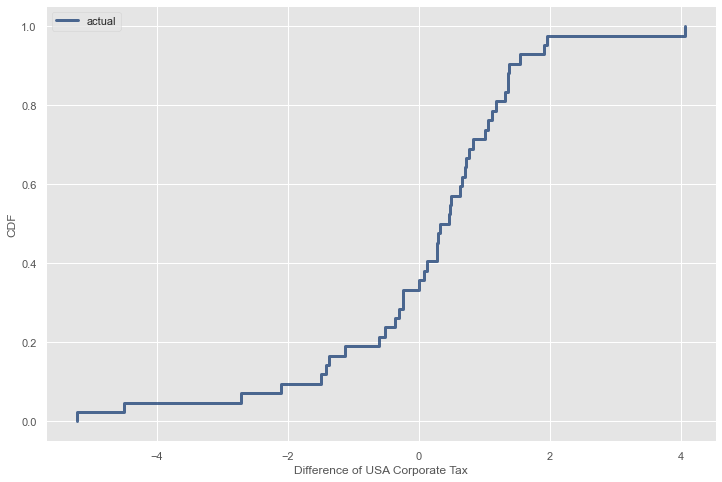

In [288]:
# difference between consecutive Corporate Tax rates and CDF is the distribution of this difference
diffs = usa.Corporate_Tax.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Difference of USA Corporate Tax', ylabel='CDF')

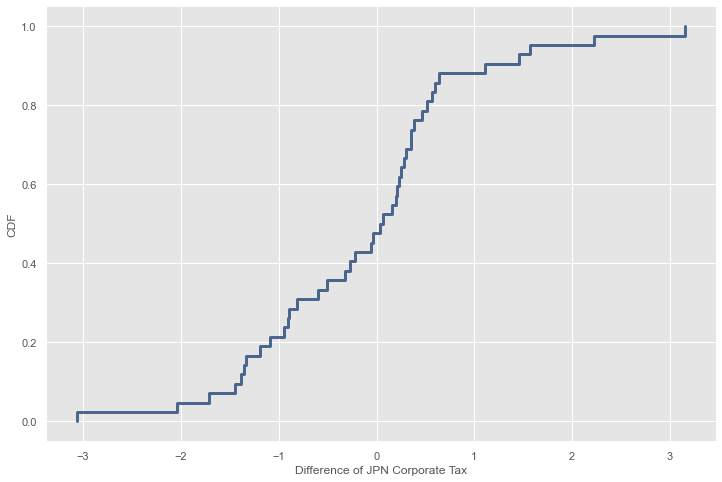

In [295]:
# difference between consecutive Corporate Tax rates and CDF is the distribution of this difference
diffs = jpn.Corporate_Tax.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Difference of JPN Corporate Tax', ylabel='CDF')

#### Scatter Plots

Scatter plot of Corporate Tax rate vs. Uemployment rates

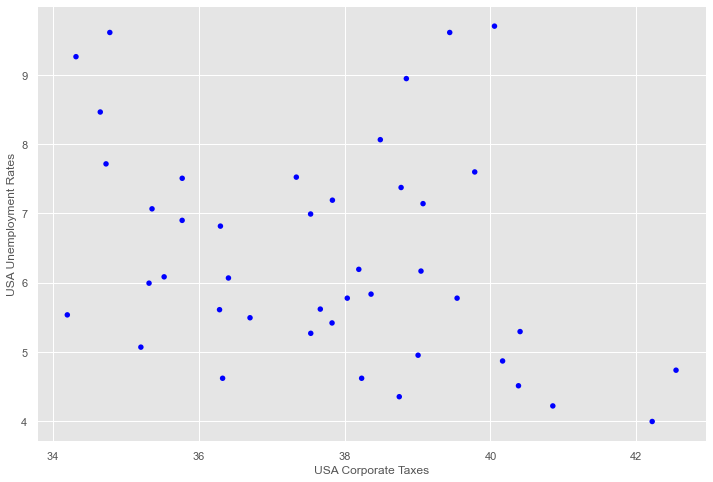

In [291]:
CorpTax, UempRate = usa.Corporate_Tax, usa.Unemployment_Rates

thinkplot.Scatter(CorpTax, UempRate, alpha=1)
thinkplot.Config(xlabel='USA Corporate Taxes',
                 ylabel='USA Unemployment Rates',
                 legend=False)

The Data between the two variable is dispersed and doesn't show any significant trend, There is a negative weak relationship between the two though

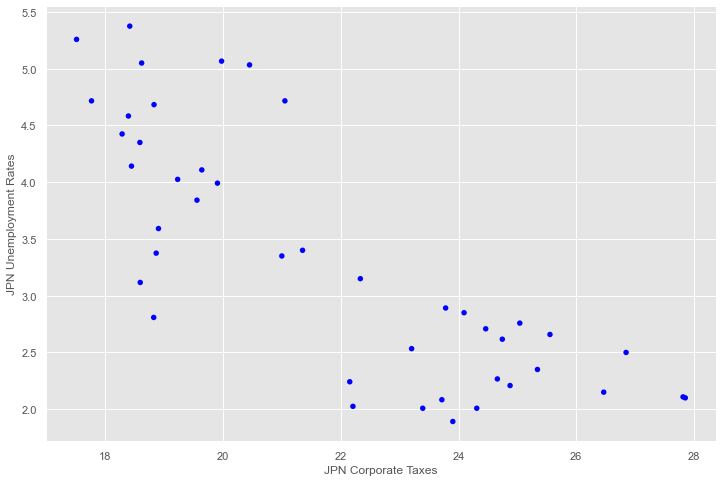

In [292]:
CorpTax, UempRate = jpn.Corporate_Tax, jpn.Unemployment_Rates

thinkplot.Scatter(CorpTax, UempRate, alpha=1)
thinkplot.Config(xlabel='JPN Corporate Taxes',
                 ylabel='JPN Unemployment Rates',
                 legend=False)

There seem to have a negative relationship between Unemployment and Corporate taxes for Japan.

Scatter plot of Corporate Tax rate vs. CPI Index

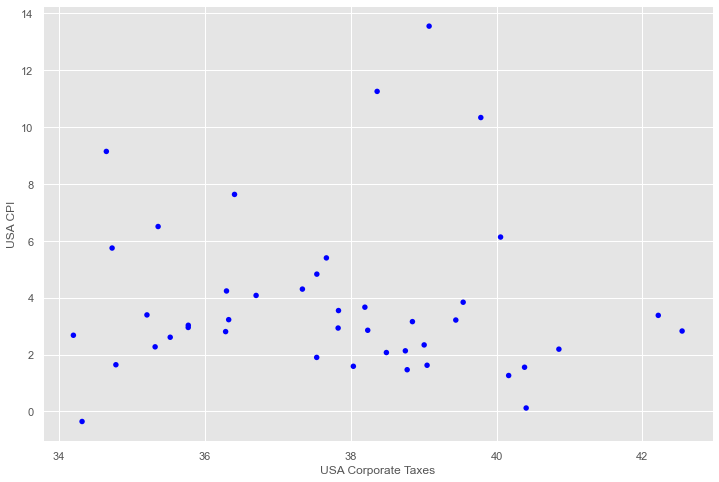

In [293]:
CorpTax, cpi1 = usa.Corporate_Tax, usa.CPI

thinkplot.Scatter(CorpTax, cpi1, alpha=1)
thinkplot.Config(xlabel='USA Corporate Taxes',
                 ylabel='USA CPI',
                 legend=False)

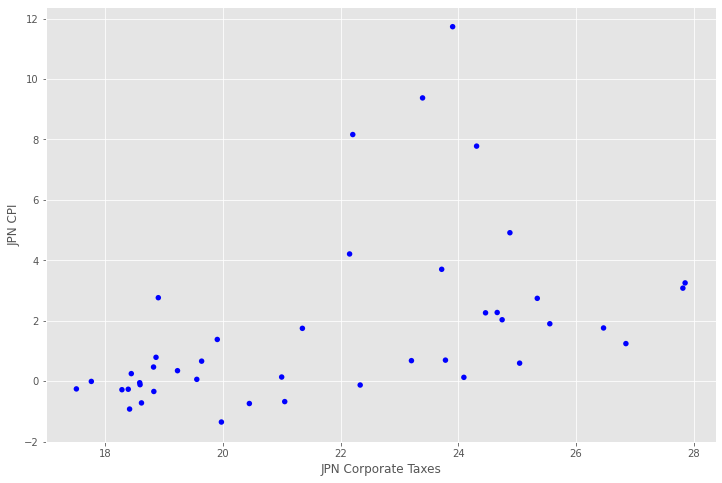

In [206]:
CorpTax, cpi1 = jpn.Corporate_Tax, jpn.CPI

thinkplot.Scatter(CorpTax, cpi1, alpha=1)
thinkplot.Config(xlabel='JPN Corporate Taxes',
                 ylabel='JPN CPI',
                 legend=False)

#### Correlation

In [296]:
# Caculates Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [299]:
# calculating pearsonr usign scripy.stats. It gives two sided value, but we will need only first.
CorpTax, UempRate = usa.Corporate_Tax, usa.Unemployment_Rates
corr, _ = scipy.stats.pearsonr(CorpTax, UempRate)
spcorr, _ = scipy.stats.spearmanr(CorpTax, UempRate)

print('Pearson correlation for US Corporate tax vs. Unemployment: %.3f' % corr)
print('Spearmans correlation for US Corporate tax vs. Unemployment: %.3f' % spcorr)
print("Covariance of US Corp Tax vs Unemployment rates: {}". format(Cov(CorpTax, UempRate)))

Pearson correlation for US Corporate tax vs. Unemployment: -0.317
Spearmans correlation for US Corporate tax vs. Unemployment: -0.310
Covariance of US Corp Tax vs Unemployment rates: -1.0377579918177389


In [300]:
# calculating pearsonr usign scripy.stats. It gives two sided value, but we will need only first.
CorpTax, UempRate = jpn.Corporate_Tax, jpn.Unemployment_Rates
corr, _ = scipy.stats.pearsonr(CorpTax, UempRate)
spcorr, _ = scipy.stats.spearmanr(CorpTax, UempRate)

print('Pearson correlation for JPN Corporate tax vs. Unemployment: %.3f' % corr)
print('Spearman correlation for JPN Corporate tax vs. Unemployment: %.3f' % spcorr)
print("Covariance of JPN Corp Tax vs Unemployment rates: {}". format(Cov(CorpTax, UempRate)))

Pearson correlation for JPN Corporate tax vs. Unemployment: -0.804
Spearman correlation for JPN Corporate tax vs. Unemployment: -0.777
Covariance of JPN Corp Tax vs Unemployment rates: -2.6282595615868036


Testing for Mean difference between both company's unemployment rate. Since Japan Corporate Tax is much lower than USA COrporate tax.

In [302]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    
    # calculates the absolute difference in mean for both groups
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    # combines the two groups into one
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    # simulates the null hypothesis
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [303]:
# Test: compare mean unemployment rates
# H_0: There is no difference between the mean unemployment rates between the USA and JPN
# H_1: There is a difference in means.    
data1 = usa.Unemployment_Rates.values, jpn.Unemployment_Rates.values
dt1 = DiffMeansPermute(data1)
pvalue1 = dt1.PValue(iters=1000)
print("Test 1: Difference in mean Unemployment rates for USA and JPN. The p-value is {}".format(pvalue1))

Test 1: Difference in mean Unemployment rates for USA and JPN. The p-value is 0.0


We reject the null hypothesis because p-value is less than .05

#### Regression Analysis for USA Variables

In [304]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

# calculates slope and intercepttof the relationship
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    # calculates covariance of x & y and then divide it by x variance.
    # slope of the linear fit
    slope = Cov(xs, ys, meanx, meany) / varx
    
    # intercept of the linear fit
    inter = meany - slope * meanx

    return inter, slope


# returns the difference between actual values and fitted lines
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)   # observed values
    yhat = inter + slope * xs   # expected values
    res = ys - yhat
    return res

# r-squared
def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

In [305]:
intercept, slope = LeastSquares(usa.Corporate_Tax, usa.Unemployment_Rates)
intercept, slope

(15.273898751684174, -0.2348091250621592)

In [309]:
residuals = Residuals(usa.Corporate_Tax, usa.Unemployment_Rates, intercept, slope)
usa['residual'] = residuals
# Pearson Correlation
corr, _ = scipy.stats.pearsonr(usa.Corporate_Tax, usa.Unemployment_Rates)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons p^2: %.3f' % corr**2)


Pearsons correlation: -0.317
Pearsons p^2: 0.101


<AxesSubplot:xlabel='Corporate_Tax', ylabel='residual'>

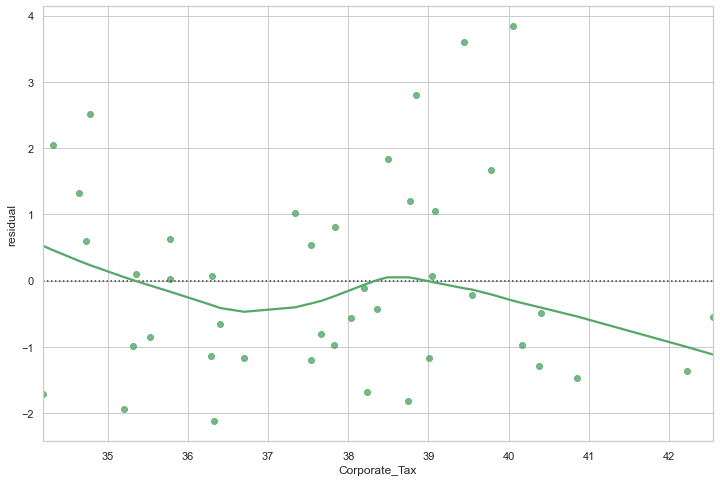

In [310]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=usa.Corporate_Tax, y=usa.residual, lowess=True, color="g")

#### Regression Analysis for JPN Variables

In [313]:
intercept, slope = LeastSquares(jpn.Corporate_Tax, jpn.Unemployment_Rates)
intercept, slope

(9.613666242913101, -0.28785641893438374)

In [314]:
residuals = Residuals(jpn.Corporate_Tax, jpn.Unemployment_Rates, intercept, slope)
jpn['residual'] = residuals
# Pearson Correlation
corr, _ = scipy.stats.pearsonr(jpn.Corporate_Tax, jpn.Unemployment_Rates)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons p^2: %.3f' % corr**2)


Pearsons correlation: -0.804
Pearsons p^2: 0.647


<AxesSubplot:xlabel='Corporate_Tax', ylabel='residual'>

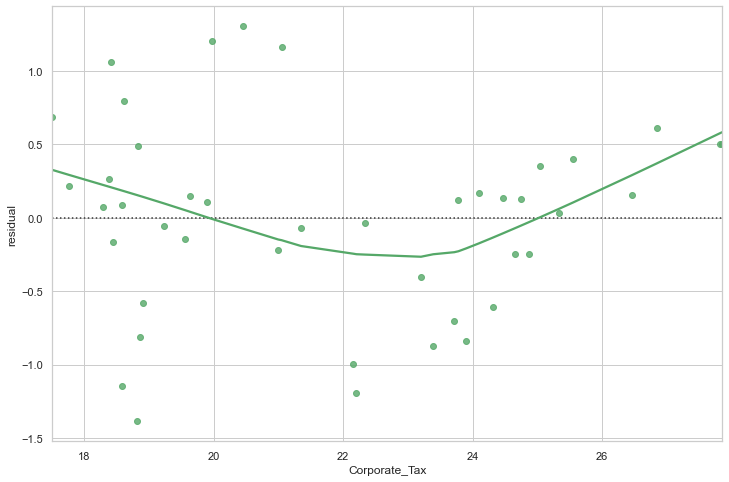

In [312]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=jpn.Corporate_Tax, y=jpn.residual, lowess=True, color="g")

Based on the analysis both residual plots have pattern, so it violates the assumption of homoscedasticity. Therefor, person r is not the best model for this data. However, they do show non-linear relationship therefore, spearman test is a better Model for this.

Initially, the Question was Do tax cuts create jobs? This statement implies that as taxes gets lower, so does the unemployment rate. Unemployment rate is one indicator to measure jobs created, We should’ve seen some positive relationship. Though, there is a relationship between the two variables, it is negative and non-linear. The Covariance is also negative, stating that they both deviates in opposite direction. Therefore I conclude, taxes don’t really create jobs. Furthermore, when compared to JAPAN, who historically had lower tax rates, but had higher unemployment rates with a strong negative relationship, indicating that lower taxes causes more unemployment
